# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>
# Южаков Максим, группа 3

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [4]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [4]:
data.dtypes

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object

В нижеуказанных признаках есть опечатки.Например, при выводе data.sex.value_counts() помимо M и F есть значение m или в некоторых признаках вместо 0 записана буква о.

In [5]:
data.sex.value_counts()

F    591
M    446
m      7
Name: sex, dtype: int64

In [4]:
data.sex = data.sex.apply(lambda x: 'M' if x=='m' else x)
data.Pstatus = data.Pstatus.apply(lambda x: 'T' if x=='t' else x)
data.Medu = data.Medu.apply(lambda x: '0' if x=='o' else x)
data.Fedu = data.Fedu.apply(lambda x: '0' if x=='o' else x)
data.Mjob = data.Mjob.apply(lambda x: 'at_home' if x=='at-home' else x)
data.Fjob = data.Fjob.apply(lambda x: 'at_home' if x=='at-home' else x)
data.guardian = data.guardian.apply(lambda x: 'father' if x=='futher' else x)

In [7]:
data.sex.value_counts()

F    591
M    453
Name: sex, dtype: int64

Так же приведем некоторые категориальные признаки к интовским значениям, чтобы в дальнейшем было удобнее строить с ними графики

In [5]:
for i in ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    data[i] = data[i].apply(lambda x: '0' if x=='no' else '1')
    data[i] = data[i].astype(int)

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   int32  
 18  famsup      1044 non-null   int32  
 19  paid        1044 non-null  

Видим, что в графе cheating больше половины значений - пропущенные. Поэтому я решил убрать его совсем, так как 
он не несет почти никакой информации

In [6]:
data = data.drop('cheating', 1)

Видно,что в столбцах "famrel","Dalc",'Walc'пропущенно по 10 значений. Учитывая, что это числовые признаки, их можно заменить на медианные значения своего признака, так как это не повлияет на общую картину данного наблюдения.

In [7]:
for i in ["famrel","Dalc",'Walc']:
    median = data[i].median()
    data[i] = data[i].fillna(median)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   int32  
 18  famsup      1044 non-null   int32  
 19  paid        1044 non-null  

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

#Проанализировав данные на опечатки в первом задании, становится очевидно, что в каткгориальных признаках отсутствуют выбросы.
P.S Чтобы не выводить много графиков я удалил те, в которых на графике boxplot отсутствуют выбросы#

2 выброса по возрасту - 22 года, таких наблюдений 2.

<AxesSubplot:xlabel='age'>

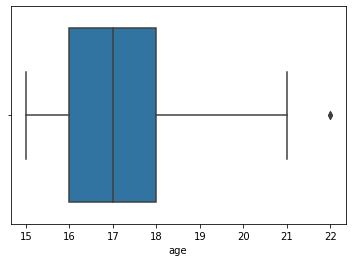

In [13]:
sns.boxplot(x = 'age', data = data)

In [16]:
data.age.value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

24 выброса с пунктом 4

<AxesSubplot:xlabel='traveltime'>

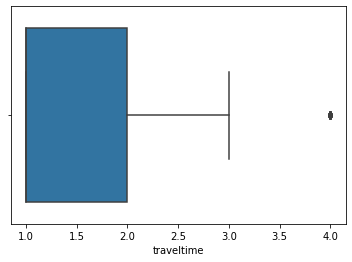

In [92]:
sns.boxplot(x = 'traveltime', data = data)

In [17]:
data.traveltime.value_counts()

1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64

62 выброса по учебному времени

<AxesSubplot:xlabel='studytime'>

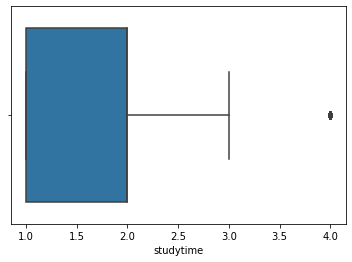

In [93]:
sns.boxplot(x = 'studytime', data = data)

In [18]:
data.studytime.value_counts()

2    503
1    317
3    162
4     62
Name: studytime, dtype: int64

183 выбросов по заваленным экзаменам, у большего числа учеников 0 завалов, поэтому остальные значение попадают под выбросы 

<AxesSubplot:xlabel='failures'>

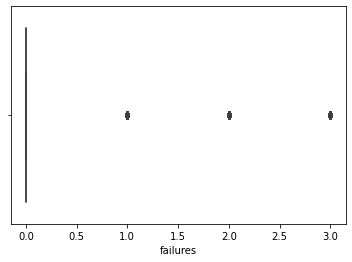

In [94]:
sns.boxplot(x = 'failures', data = data)

In [20]:
data.failures.value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

76 выбросов со значениями 1 и 2

<AxesSubplot:xlabel='famrel'>

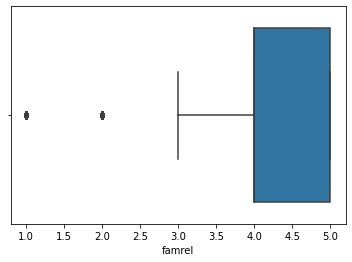

In [95]:
sns.boxplot(x = 'famrel', data = data)

In [21]:
data.famrel.value_counts()

4.0    518
5.0    283
3.0    167
2.0     46
1.0     30
Name: famrel, dtype: int64

64 выброса с показателем 1

<AxesSubplot:xlabel='freetime'>

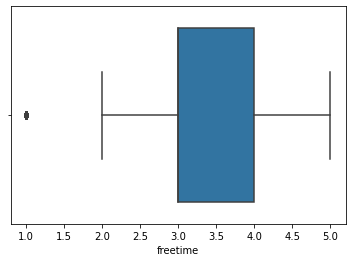

In [96]:
sns.boxplot(x = 'freetime', data = data)

In [22]:
data.freetime.value_counts()

3    408
4    293
2    171
5    108
1     64
Name: freetime, dtype: int64

52 выброса с пунктами 4 и 5

<AxesSubplot:xlabel='Dalc'>

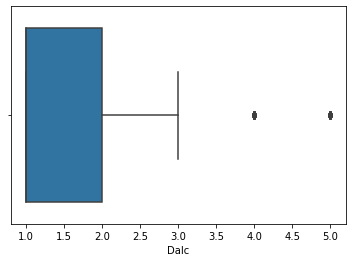

In [99]:
sns.boxplot(x = 'Dalc', data = data)

In [23]:
data.Dalc.value_counts()

1.0    729
2.0    194
3.0     69
5.0     26
4.0     26
Name: Dalc, dtype: int64

49 выбросов от 16 пропусков и более

<AxesSubplot:xlabel='absences'>

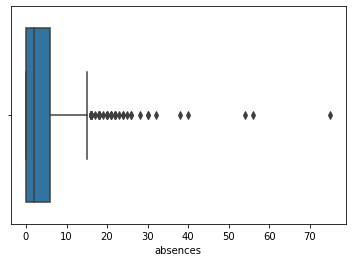

In [102]:
sns.boxplot(x = 'absences', data = data)

In [32]:
data.absences.value_counts().sort_index(ascending=True)

0     359
1      15
2     175
3      15
4     146
5      17
6      80
7      10
8      64
9      10
10     38
11      8
12     24
13      4
14     20
15      5
16     17
17      1
18      8
19      1
20      4
21      3
22      5
23      1
24      2
25      1
26      2
28      1
30      2
32      1
38      1
40      1
54      1
56      1
75      1
Name: absences, dtype: int64

1 выброс с оценкой 0

<AxesSubplot:xlabel='G1'>

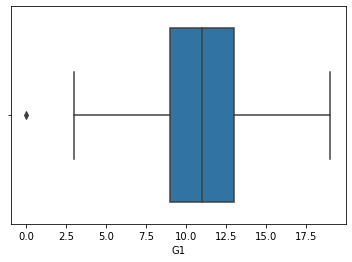

In [103]:
sns.boxplot(x = 'G1', data = data)

In [33]:
data.G1.value_counts().sort_index(ascending=True)

0       1
3       1
4       3
5      12
6      33
7      70
8      83
9      96
10    146
11    130
12    117
13    105
14    101
15     59
16     44
17     24
18     15
19      4
Name: G1, dtype: int64

20 выбросов с оценкой 0

<AxesSubplot:xlabel='G2'>

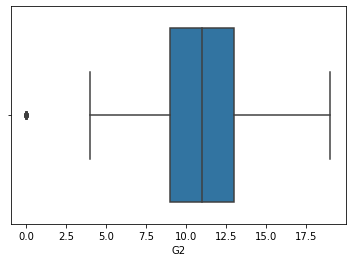

In [104]:
sns.boxplot(x = 'G2', data = data)

In [34]:
data.G2.value_counts().sort_index(ascending=True)

0      20
4       1
5      18
6      21
7      37
8      72
9     122
10    129
11    138
12    127
13    117
14     77
15     72
16     38
17     25
18     26
19      4
Name: G2, dtype: int64

54 выброса с оценками 0 и 1

<AxesSubplot:xlabel='G3'>

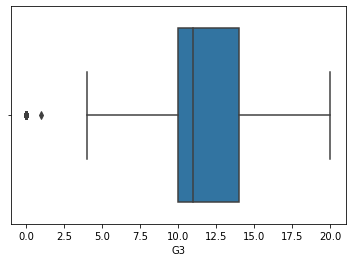

In [105]:
sns.boxplot(x = 'G3', data = data)

In [35]:
data.G3.value_counts().sort_index(ascending=True)

0      53
1       1
4       1
5       8
6      18
7      19
8      67
9      63
10    153
11    151
12    103
13    113
14     90
15     82
16     52
17     35
18     27
19      7
20      1
Name: G3, dtype: int64

Просуммировав выбросы по признакам получается число 587

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

числовые признаки

In [106]:
data.describe()

,ID,age,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.0,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.190613,16.726054,1.522989,1.970307,0.264368,1.0,0.613027,0.210728,0.494253,0.799808,0.914751,0.792146,0.363985,3.936782,3.201149,3.156130,1.492337,2.288314,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.330362,1.239975,0.731727,0.834353,0.656142,0.0,0.487291,0.408021,0.500207,0.400335,0.279386,0.405967,0.481375,0.928833,1.031507,1.152575,0.911700,1.282008,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,15.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,16.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,17.000000,1.000000,2.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,18.000000,2.000000,2.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999194.000000,22.000000,4.000000,4.000000,3.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


категориальные:

In [107]:
data.describe(include=['object'])

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,5,5,5,5,4,3
top,Por,GP,F,U,GT3,T,4,2,other,other,course,mother
freq,649,772,591,759,738,923,306,324,399,584,430,728


На первую школу заведено 772 записи, на вторую - 272

In [38]:
data.school.value_counts()

GP    772
MS    272
Name: school, dtype: int64

Сколько студентов посещают математику, сколько - португальский?

In [37]:
data.Subject.value_counts()

Por     649
Math    395
Name: Subject, dtype: int64

Студенты какого курса чаще заваливают экзамены? - Сутденты курса Португальского языка

In [36]:
data.groupby("Subject").failures.sum()

Subject
Math    132
Por     144
Name: failures, dtype: int64

Сколько в среднем времени в неделю уходит на учебу по каждому предмету? - На математику - 2 часа, на португальский - 1.9

In [111]:
data.groupby("Subject").studytime.mean()

Subject
Math    2.035443
Por     1.930663
Name: studytime, dtype: float64

На что чаще обращают внимание при выборе школы? Самая популярная причина выбора школы - читаемые там курсы.

In [112]:
data.reason.value_counts()

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

Распределение оценок G1:

Text(0.5, 1.0, 'Grades')

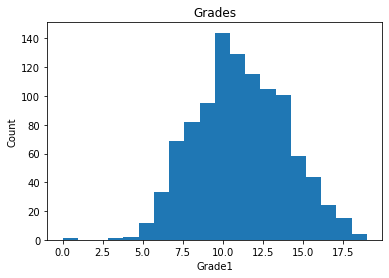

In [66]:
import matplotlib.pyplot as plt
plt.hist(data['G1'], bins = 20)
plt.xlabel('Grade1')
plt.ylabel('Count')
plt.title('Grades')

Распределение оценок G2:

Text(0.5, 1.0, 'Grades')

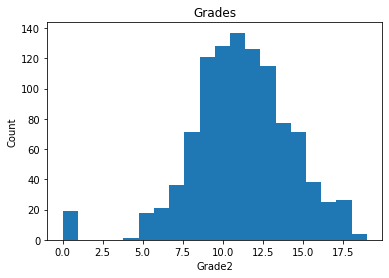

In [67]:
import matplotlib.pyplot as plt
plt.hist(data['G2'], bins = 20)
plt.xlabel('Grade2')
plt.ylabel('Count')
plt.title('Grades')

Распределение оценок G3:

Text(0.5, 1.0, 'Grades')

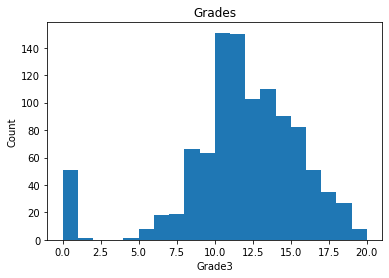

In [68]:
plt.hist(data['G3'], bins = 20)
plt.xlabel('Grade3')
plt.ylabel('Count')
plt.title('Grades')

Красным цветом указано распределение португальского, синим - математики.
Можно увидеть, что в первом полугодии(G1) плотность на оценке от 8 до 15 намного выше у учеников португальского курса. Однако, в остальных местах плотность курсов несильно отличается.

Text(0.5, 1.0, 'Density Plot of Final Grades(1) by Subject')

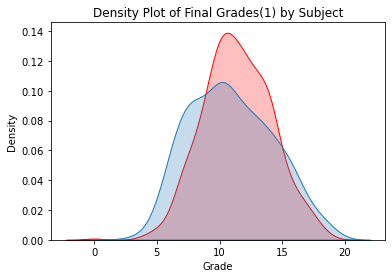

In [47]:
sns.kdeplot(data[data['Subject'] == 'Por']['G1'],
label = 'Portugese', shade = True, color = 'r')
sns.kdeplot(data[data['Subject'] == 'Math']['G1'],
label = 'Math', shade = True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades(1) by Subject')

Во втором полугодии почти те же самые результаты. Единственное отличие - увеличение плотности на оценке 0 баллов, на обоих курсах количсетво несдавших возросло, но плотность 0 балла на математическом курсе все-таки больше. 

Text(0.5, 1.0, 'Density Plot of Final Grades(2) by Subject')

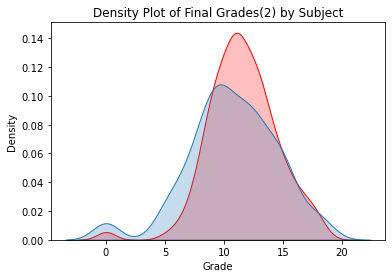

In [50]:
sns.kdeplot(data[data['Subject'] == 'Por']['G2'],
label = 'Portugese', shade = True, color = 'r')
sns.kdeplot(data[data['Subject'] == 'Math']['G2'],
label = 'Math', shade = True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades(2) by Subject')

На итоговой оценке попрежнему по полотности реультатов близких к оценке 10 лидиирует португальский курс, что касается оценки 0, то на математическом курсе плотность превзошла оценку 0.02, т.е сильно выросла.
Как результат,взвесив все 3 графика, можно увидеть, что в среднем ученики португальского курса получают 10-15 баллов больше, чем ученики математического курса. Однако, встретить крайние значения(оценка 0 и оценка 20) с большей вероятностью можно у учеников математического куса.К тому же, на всех трех графиках, ученики мат курса с большей вероятностью получают оценку от 0 до 8.

Text(0.5, 1.0, 'Density Plot of Final Grades(3) by Subject')

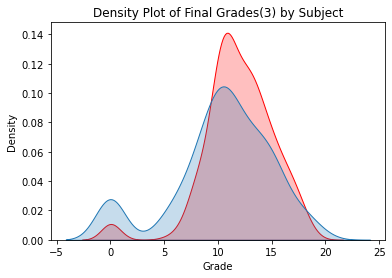

In [51]:
sns.kdeplot(data[data['Subject'] == 'Por']['G3'],
label = 'Portugese', shade = True, color = 'r')
sns.kdeplot(data[data['Subject'] == 'Math']['G3'],
label = 'Math', shade = True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades(3) by Subject')

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

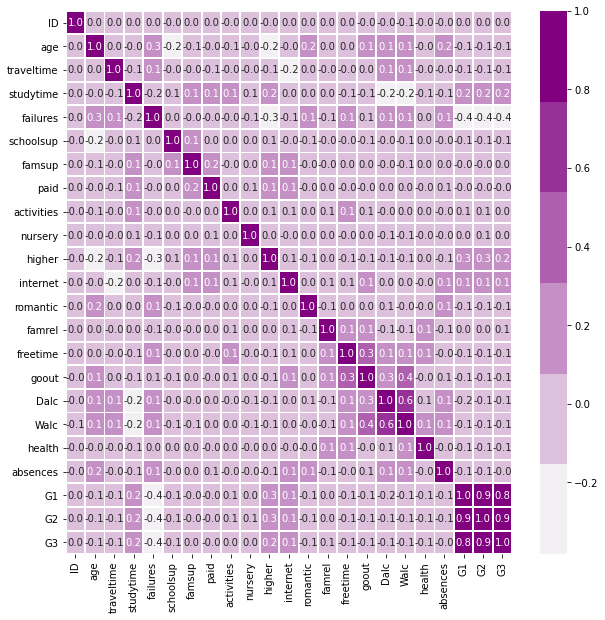

In [144]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.9, cmap=sns.light_palette("purple"));

Большинство признаков далеких от главной диагонали мало зависимы от других признаков(корелляция близка к 0.0).Однако можно увидеть следующи зависимиости:
- Чем чаще студенты проводят время с друзьями, тем больше показатель Dalc и Walc, то есть распитие алкогольных напитков зависит от того, как часто студенты проводят время с друзьями.
- Все три вида оценок G1,G2,G3 зависят от того,хочет ли студент получать высшее образование. Это выглядит логичным, так как их поступление и обучение в вузе напрямую зависит от их обучения в школе
- Как ни странно возраст студента влияет на количество несдач(0.3), возможно это связано с тем, что чем старше ученик,тем больше времени он учится, следовательно, тем больше у него было шансов не сдать экзамен.
- Очевидной выглядит зависимость studytime и G1,G2,G3, ведь чем больше студент уделяет времени образованию - тем лучше у него оценки. Правда,я ожидал, что данный коэффицент будет больше.
- Самая очевидная зависимость - зависимость оценок за полугодее и итоговой оценки.
- Видно, что между higher и failures присутствует отрицательная корреляция. Следовательно, если студент хочет получить высшее образование он не имеет заваленных предметов и наоборот, чем больше у ученика несдач,тем ниже вероятность того, что ему не нужно высшее образование
- Распитие алкогольных напитков отрицательно коррелирует со studytime, видимо, ученикам приходится делать выбор либо больше времени пить алкоголь, либо больше времени уделять урокам
- Отрицательнойзависимостью обладают travel time и internet. Чем больше travel time, тем дальше от города живет ученик и, получается, тем меньше шанс, что у него есть интернет.
- Очень странно, что признаки freetime и absences не зависят друг от друга.Ведь если ученик пропускает занятия, то у него появляется свободное время.

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

Заменим данные числовыми признаками

In [8]:
data["Subject"] = data['Subject'].apply(lambda x: '1' if x=='Por' else '0')
data["Subject"] = data['Subject'].astype(int)
data["school"] = data['school'].apply(lambda x: '1' if x=='GP' else '0')
data["school"] = data['school'].astype(int)
data["sex"] = data['sex'].apply(lambda x: '1' if x=='M' else '0')
data["sex"] = data['sex'].astype(int)
data["famsize"] = data['famsize'].apply(lambda x: '1' if x=='GT3' else '0')
data["famsize"] = data['famsize'].astype(int)
data["address"] = data['address'].apply(lambda x: '1' if x=='U' else '0')
data["address"] = data['address'].astype(int)
data["Pstatus"] = data['Pstatus'].apply(lambda x: '1' if x=='T' else '0')
data["Pstatus"] = data['Pstatus'].astype(int)

In [114]:
data_obj = data[["Subject","school","sex","address","famsize","Pstatus","Medu","Fedu"]]

- Видно, что между адресом и школой есть зависимость равная 0.3, т.е многие студенты ходят в школу, которая находится близко к их дому, это немного очевидный показатель
- Видна зависимость между Pstatus и fmsize, то естьчем больше семья, тем больше вероятность,что в ней родители живут совместно.
- Есть отрицательная зависимость между предметом и школой, т.е в школе MS больше студентов математики, а в GP - португальского

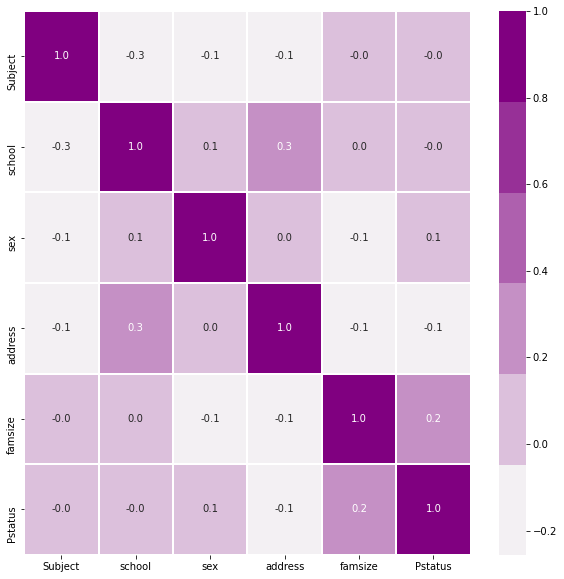

In [115]:
corr_matrix = data_obj.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.9, cmap=sns.light_palette("purple"));

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

Объединив в один признак Dalc и Walc, можем увидеть, что парни пьючаще девушек. Они имеют преимущетво как по среднему значению,так и выбросы по распитиюалкоголя девушками попадают под усы boxplot парней.

<AxesSubplot:xlabel='allalc', ylabel='sex'>

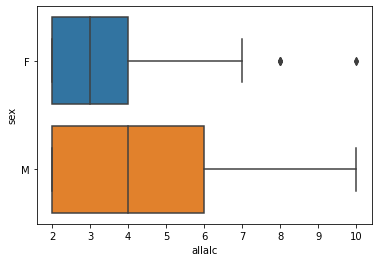

In [74]:
data["allalc"] = data["Walc"]+data["Dalc"]
sns.boxplot(x="allalc",y="sex",data=data)

Зависимость алкоголя от:
1)address(1-в городе,0-за городом) - корреляция -0.1,значит, чем меньше человек пьет алкоголя, тем больше шанс, что он живет за городом, но это очень маленькая звисимость.
2)Pstatus(1-вместе, 0-раздельно) - корреляция 0.0,значит, распитие алкоголя никак не связано с совместной жизнью родителей. Что может показаться странным.
3)higher(corr - -0.1) - следовательно, если ученик собирается получать высшее образование, он пьет меньше алкоголя. Видимо,алкоголь мешает учебе.
4)romatic - корреляция нулевая, значит, романтичские отношения никак не пересекаются с распитием алкогольных напитков.
5)freetime - корреляция 0.1,значит в небольшой степени - чем больше свободного времени у студента, тем чаще он в это время пьет алкоголь.

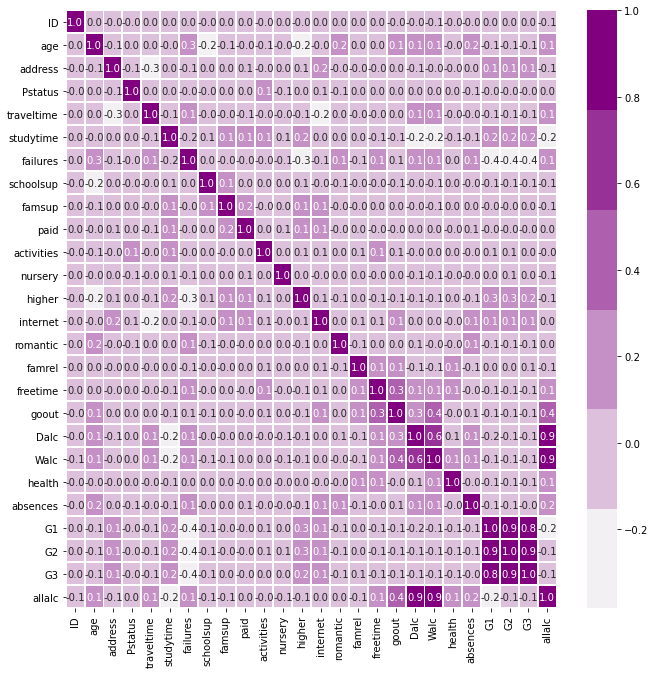

In [75]:
corr_matrix = data.corr()
plt.figure(figsize=(11, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.9, cmap=sns.light_palette("purple"));

Как мы видим, если у матери отсутствует образование, то повышается шанс, что ее ребенок будет пить алкоголь, с другой стороны если у нее в бэкграунде имеется начальная или средняя школа, то ее ребенок будет пить меньше других. Как ни странно,дети матерей с высшим образованием занимают высокое второе место по распитию алкоголя

<AxesSubplot:xlabel='Medu', ylabel='allalc'>

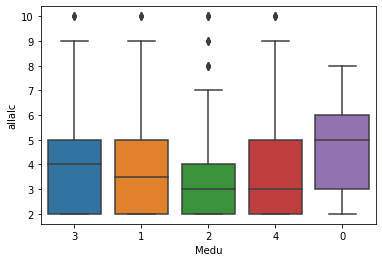

In [78]:
sns.boxplot(x="Medu",y="allalc",data =data)

Если смотерть на образование отца, то оно в равной степени влияет на распитиеалкоголя ребенком. Странным является то,что у отцов без образование дети пьют меньше других, хотя, вероятно таких наблюдений просто недостаточно.

<AxesSubplot:xlabel='Fedu', ylabel='allalc'>

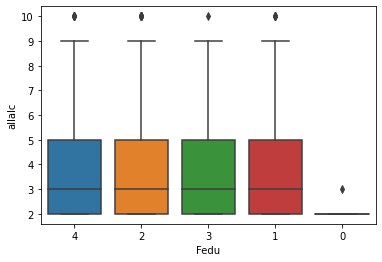

In [79]:
sns.boxplot(x="Fedu",y="allalc",data =data)

Очень интересно, что 50 лучших учеников по итоговой оценке среди учеников португальского пьют алкоголь в больших количествах, чем лучшие ученики математики.

<AxesSubplot:xlabel='Subject', ylabel='allalc'>

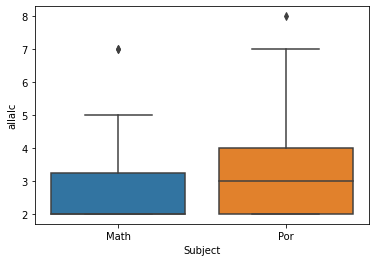

In [82]:
sns.boxplot(x="Subject",y="allalc",data=data.nlargest(50,'G3',keep ='all'))

Среди худших по оценке учеников те, кто изучают португальский пьют снова намного больше математиков, причем у них даже нет выбрсов в этом показателе. В конце концов, можно сказать, что ученики португальского курса крайне пристрастились к алкоголю. 50 худших пьют больше всех учеников из топ 50 лучших и худших по португальском и математике. Интересным является тот факт, что 50 лучших по португальскому пьют примерно столько же, чколько 50 худших в математике.

<AxesSubplot:xlabel='Subject', ylabel='allalc'>

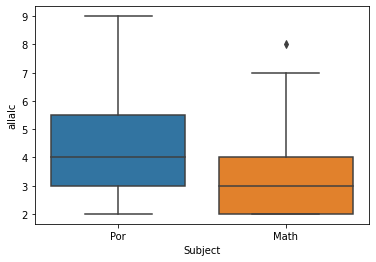

In [83]:
sns.boxplot(x="Subject",y="allalc",data=data.nsmallest(50,'G3',keep ='all'))

In [85]:
data = data.drop('allalc', 1)
data = data.drop('Pedu', 1)

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

Средняя итоговая оценка у девушек чуть выше, в остальном их оценки схожи

<AxesSubplot:xlabel='sex', ylabel='G3'>

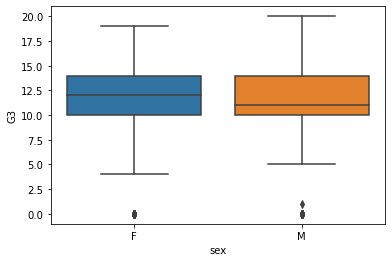

In [14]:
sns.boxplot(x="sex",y="G3",data=data)

Видимо, чем ближе к школе живет ученик, тем выше у него средняя оценка, те, кто живет дальше всех имеют самый низкий средний бал. Хотя выбросы к нулевому баллу имеются у всех.

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

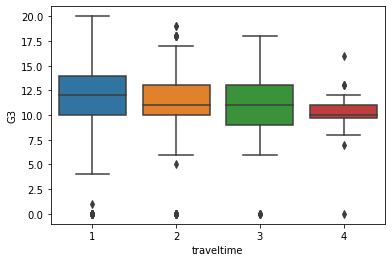

In [15]:
sns.boxplot(x="traveltime",y="G3",data=data)

я объединил в один признак schoolsup и famsup, те, кто имеют показатели сразу по 2 признакам я записал, как будто они имеют помощь только в одном показателе. В итоге получилось разделение на тех, кто имеет помощь и не имеет ее. 
Тут у нас довольно неожиданный результат, те, кто получают помощь имеют меньший средний бал, чем те, кому не оказывают помощь в учебе. Однако разброс у тех, кому помогают немного меньше.

In [9]:
def sup_category(sup):
    if sup == 0:
        return 0
    elif sup == 1:
        return 1
    else:
        return 1

<AxesSubplot:xlabel='allsup', ylabel='G3'>

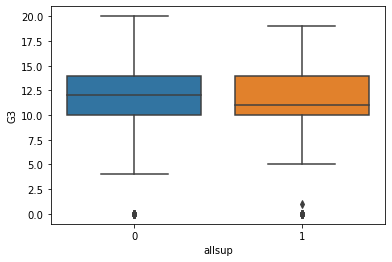

In [10]:
data["allsup"] = data["schoolsup"]+data["famsup"]
sup_categories = [sup_category(sup) for sup in data.allsup]
data['allsup'] = sup_categories
sns.boxplot(x="allsup",y="G3",data=data)

Тут снова неожиданный результат. Те, кто ходят на платные курсы имеют оценки ниже, чем у обычных студентов. Может быть,это связано с тем, что они пошли на эти самые курсы из-за этих нихких показателей в учебе.

<AxesSubplot:xlabel='paid', ylabel='G3'>

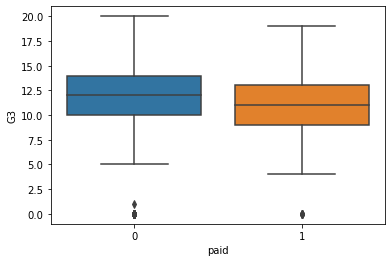

In [17]:
sns.boxplot(x="paid",y="G3",data=data)

Здесь все более логично. Те, кто имеет доступ в интернет - учится лучше тех,кто его не имеет.

<AxesSubplot:xlabel='internet', ylabel='G3'>

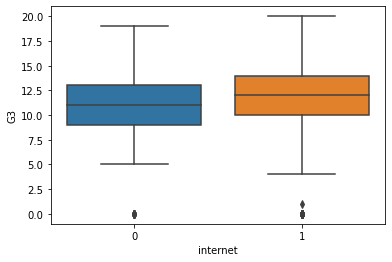

In [20]:
sns.boxplot(x="internet",y="G3",data=data)

Как результат, мы видим,что романтические отношения влияют на оценку, то есть,если ученик состоит в таких отношениях - его успеваемость немного хуже.

<AxesSubplot:xlabel='romantic', ylabel='G3'>

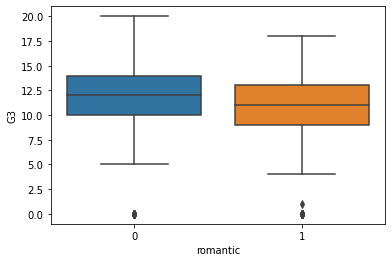

In [21]:
sns.boxplot(x="romantic",y="G3",data=data)

На это графике мы видим, что лучшие оценки в среднем да и вообще получают студенты, которые почти не пьют. Наименьший средний балл имеют студенты с суммой алкогольного распития - 6. К тому же, мы видим, что максимальный балл меньше у тех, кто пьет больше алкоголя. Необычным является тот факт, что самые пьющие студенты не имеют оценку меньше 5 баллов.

<AxesSubplot:xlabel='allalc', ylabel='G3'>

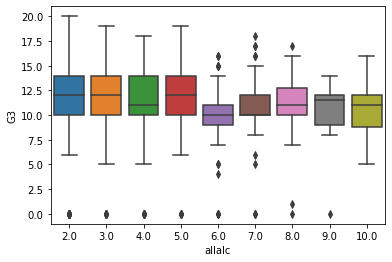

In [94]:
data["allalc"] = data["Walc"]+data["Dalc"]
sns.boxplot(x="allalc",y="G3",data=data)

In [95]:
data = data.drop('allsup', 1)
data = data.drop('allalc', 1)

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [11]:
def g_category(g):
    if 18 <= g <= 20:
        return 4
    elif 14 <= g <= 17:
        return 3
    elif 8 <= g <= 13:
        return 2
    else:
        return 1

In [12]:
G_categories = [g_category(G) for G in data.G3]
data['G_category'] = G_categories
data.G_category.value_counts()

2    650
3    259
1    100
4     35
Name: G_category, dtype: int64

как мы видим, среди учеников получивших максимальный балл причины: course,home,reputation имеют равную плотнось, чуть меньшую - причины other. На оценке 4: самой распространенной причиной является репутация школы, одинаковой распределение оценка 3 получила у причин home и couse. другие причины наименее популярны. Далее мы видим, что среди тех, кто получил оценку 2 наиболее популярной причиной выбора школы стал курс,преподаваемый в школе, далее - нахождение школы рядом с домом. На удивление репутаци школы для ученико с оценкой 2 менее важна, чем другие причины. У учеников с самой плохой оценкой лидируют course и other. 
Таким образом, по мере увеличения оценки у учеников основным требованием к школе является репутация, по мере уменьшения оценки - курсы, которые там ведутся. Примерно одинаковым по важности для всех оценок является критерий близость от дома.

Text(0.5, 1.0, 'Density Plot of Final Grades by reason')

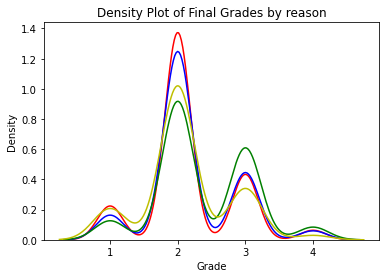

In [105]:
sns.kdeplot(data[data['reason'] == 'course']['G_category'],
label = 'course', shade = False, color = 'r')
sns.kdeplot(data[data['reason'] == 'home']['G_category'],
label = 'home', shade = False, color = "b")
sns.kdeplot(data[data['reason'] == 'reputation']['G_category'],
label = 'reputation', shade = False, color = 'g')
sns.kdeplot(data[data['reason'] == 'other']['G_category'],
label = 'other', shade = False,color="y")
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by reason')

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

В таблице 614 дубликатов, т.е 307 человек ходили на 2 курса 

Для анализа я вычеркнул те признаки, которые могут быть уникальными для каждого предмета - subject,absences,G1,G2,G3 и тд, т.е те признаки, которые непосредственно связаны с курсом.

In [81]:
data_new.duplicated(subset=["school","sex", 'age', 'address', 'famsize', 'Pstatus','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'],keep=False).value_counts()

True    614
dtype: int64

In [33]:
def id_cnt(l):
    l1 = []
    cnt = 0
    for i in data["ID"]:
        if cnt in l:
            l1.append(i)
        cnt = cnt+1
    return l1

In [74]:
counter = 0
data_new = data
l = data_new.duplicated(subset=["school","sex", 'age', 'address', 'famsize', 'Pstatus','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'],keep=False).to_list()
counter = 0
l1 = []
for i in l:
    if i ==True:
        l1.append(counter)
    counter = counter+1
l1 = id_cnt(l1)
for i in data_new["ID"]:
    if i not in l1:
        data_new.drop(data_new[(data_new["ID"]==i)].index, inplace=True)
data_new.groupby("Subject").G3.mean()

Subject
0    10.993443
1    12.825243
Name: G3, dtype: float64

Как мы видим оценка португальского курса учеников, которые ходят сразу на два курса выше на 2 балла, чем оценка математатического курса

Text(0.5, 1.0, 'Density Plot of Final Grades(3) by Subject')

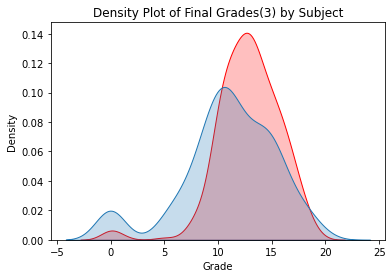

In [77]:
sns.kdeplot(data_new[data_new['Subject'] == 1]['G3'],
label = 'Portugese', shade = True, color = 'r')
sns.kdeplot(data_new[data_new['Subject'] == 0]['G3'],
label = 'Math', shade = True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades(3) by Subject')

Что касается плотности распределения, то на португальском курсе плотность стремится к своему максимуму ближе к 15 баллам, в то яремя как мат курс находиится около 10. И плотность распределения 0 балла среди математического курса так же выше.

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

для оценки 4 балла:
failures = 0, higher = 1, studytime = 4, school = GP(1), subject = Por(1), internet = yes, Dalc = 1 or 2, Walc = 1 or 2;sex = F(0)

для оценки 3 балла:
failures = 1, higher = 1, studytime = 3, school = GP(1), subject = Por(1), internet = yes, Dalc = 1,2 or 3, Walc = 1,2 or 3;

для оценки 2 балла:
failures = 2, higher = 0, studytime = 2, school = MS(0), subject = Math(0), internet = yes, Dalc = 2,3 or 4, Walc = 2,3 or 4;

для оценки 1 балл:
failures = 2-3, higher = 0, studytime = 1, school = MS(0), subject = Math(0), internet = no, Dalc = 3,4 or 5, Walc = 3,4 or 5;

Данную модель я строил изходя из heatmap, ориентируясь на корреляцию признаков G1,G2,G3 с другими признаками. Чем больше failures, тем ниже оценка, корреляция -0.4. Если higher = 1(yes), то судент получит оценку выше(корреляция 0.2 - 0.3). Чем выше studytime - тем выше оценка(corr = 0.2). У учеников GP средняя оценка выше(под таблицей хитмапприведены доказательства), так же у учеников португальского оценка выше. Наличие интернета так же влияет на хорошую оценку. Не менее важным признаком для получения 4 является пол( если пол мужской, то корреляция с алкоголем 0.3, а алкоголь плохо влияет на максимальный бал,судя по таблице)

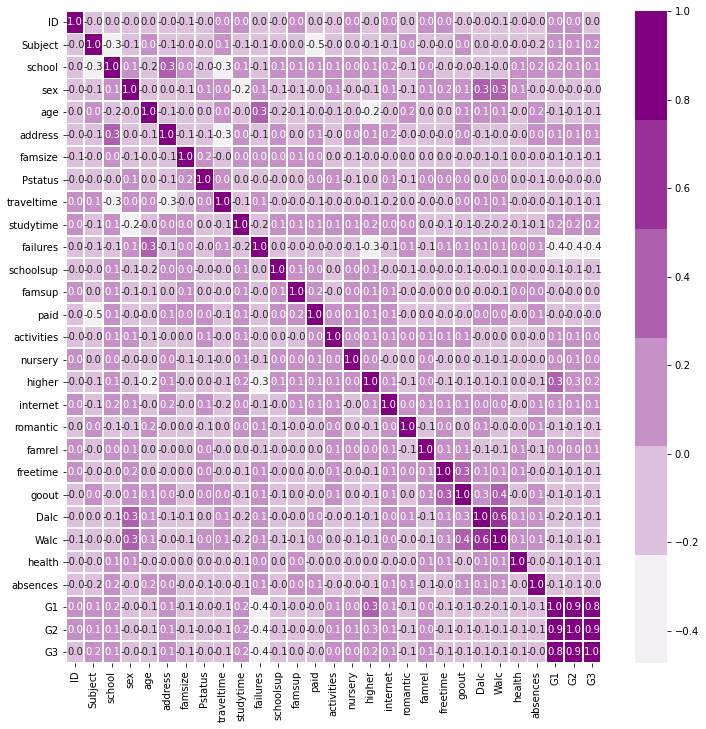

In [129]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.9, cmap=sns.light_palette("purple"));

In [137]:
data.groupby("Subject").G3.mean()

Subject
0    10.415190
1    11.906009
Name: G3, dtype: float64

In [138]:
data.groupby("school").G3.mean()

school
0    10.514706
1    11.633420
Name: G3, dtype: float64

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

Исследуем признак higher, судя по таблицам корреляции он взаимодействует со многими параметрами и влияет на них.

Очень интересный результат сравнения higher и age. Судя по всему, с увеличением возраста ученики все меньше интересуются получением высшего образования.

<AxesSubplot:xlabel='higher', ylabel='age'>

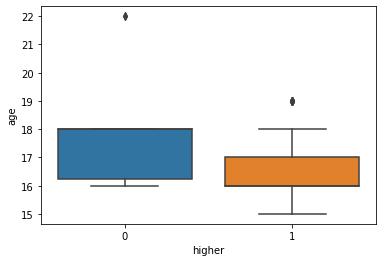

In [84]:
sns.boxplot(x="higher",y="age",data=data)

Величина итоговой оценки у тех ребят, которые собираются получать высшее образование выше,чем у остальных

<AxesSubplot:xlabel='higher', ylabel='G3'>

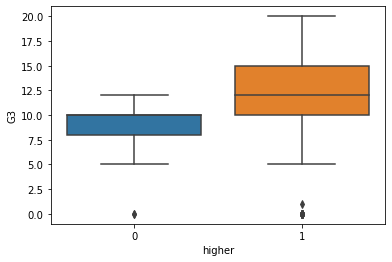

In [82]:
sns.boxplot(x="higher",y="G3",data=data)

Проверив зависимость higher и failures, можно сделать выводы, что ученики, которые получали неудовлетворительный резульаты в учебе не собираются получать высшееобразование, или же, наоборот, среди учеников, которые не хотят высшего образования имеется тенденция получать неуды.

<AxesSubplot:xlabel='higher', ylabel='failures'>

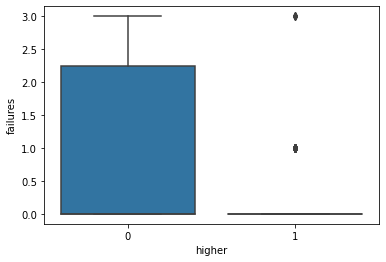

In [85]:
sns.boxplot(x="higher",y="failures",data=data)

Можно проверить зависимость оценки по 4-х балльной системе от возраста учеников. Как мы видим, чем старше ученик,тем ниже его итоговая оценка, к 19-22 годам максмальные значения оценок студентов лишь прближаются к средним значениям прежних лет.

<AxesSubplot:xlabel='age', ylabel='G_category'>

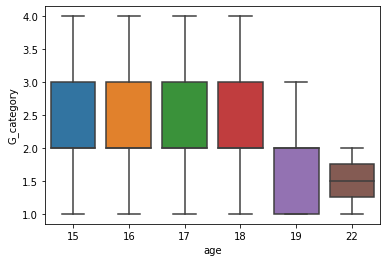

In [87]:
sns.boxplot(x="age",y="G_category",data=data)